In [190]:
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

In [2]:
cols =[
    'município', 
    'seção',
    'categoria',
    'graudeinstrução',
    'sexo',
    'tipomovimentação',
    'raçacor',
]
newcols=[
    'municipio',
    'secao',
    'categoria',
    'instrucao',
    'genero',
    'tipo',
    'raca'
]
a = list(string.ascii_uppercase)
genero = ['M','F','N/I']
secao = [
    'Agricultura/Pecuária',
    'Ind. Extrativas',
    'Ind. Transformação',
    'Eletricidade/Gás',
    'Água/Esgoto',
    'Construção',
    'Comércio',
    'Transporte',
    'Alimentação',
    'Informação',
    'Financeiros',
    'Imobiliárias',
    'Profissionais',
    'Administrativas',
    'Adm Pública',
    'Educação',
    'Saúde',
    'Artes/Cultura',
    'Outros Serviços',
    'Domésticos',
    'Org. Internacionais',
    'Não Identificados',
]
mon = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov']

In [3]:
jan = pd.read_csv('datasets/2020/CAGEDMOV202001.txt', sep=';', usecols=cols)
fev = pd.read_csv('datasets/2020/CAGEDMOV202002.txt', sep=';', usecols=cols)
mar = pd.read_csv('datasets/2020/CAGEDMOV202003.txt', sep=';', usecols=cols)
abr = pd.read_csv('datasets/2020/CAGEDMOV202004.txt', sep=';', usecols=cols)
mai = pd.read_csv('datasets/2020/CAGEDMOV202005.txt', sep=';', usecols=cols)
jun = pd.read_csv('datasets/2020/CAGEDMOV202006.txt', sep=';', usecols=cols)
jul = pd.read_csv('datasets/2020/CAGEDMOV202007.txt', sep=';', usecols=cols)
ago = pd.read_csv('datasets/2020/CAGEDMOV202008.txt', sep=';', usecols=cols)
set_ = pd.read_csv('datasets/2020/CAGEDMOV202009.txt', sep=';', usecols=cols)
out = pd.read_csv('datasets/2020/CAGEDMOV202010.txt', sep=';', usecols=cols)
nov = pd.read_csv('datasets/2020/CAGEDMOV202011.txt', sep=';', usecols=cols)

In [5]:
data = [jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov]
def rename(df):
    for i in range(len(df)):
    
        df[i].rename(columns=dict(zip(cols, newcols)), inplace=True)
        df[i] = df[i].loc[data[i]['municipio']==410690]
        
        df[i].loc[df[i]['genero']==1,'genero'] = 'M'
        df[i].loc[df[i]['genero']==3,'genero'] = 'F'
        df[i].loc[df[i]['genero']==9,'genero'] = 'N/I'
        
        df[i].loc[df[i]['secao']=='A','secao'] = 'Agricultura/Pecuária'
        df[i].loc[df[i]['secao']=='B','secao'] = 'Ind. Extrativas'
        df[i].loc[df[i]['secao']=='C','secao'] = 'Ind. Transformação'
        df[i].loc[df[i]['secao']=='D','secao'] = 'Eletricidade/Gás'
        df[i].loc[df[i]['secao']=='E','secao'] = 'Água/Esgoto'
        df[i].loc[df[i]['secao']=='F','secao'] = 'Construção'
        df[i].loc[df[i]['secao']=='G','secao'] = 'Comércio'
        df[i].loc[df[i]['secao']=='H','secao'] = 'Transporte'
        df[i].loc[df[i]['secao']=='I','secao'] = 'Alimentação'
        df[i].loc[df[i]['secao']=='J','secao'] = 'Informação'
        df[i].loc[df[i]['secao']=='K','secao'] = 'Financeiros'
        df[i].loc[df[i]['secao']=='L','secao'] = 'Imobiliárias'
        df[i].loc[df[i]['secao']=='M','secao'] = 'Profissionais'
        df[i].loc[df[i]['secao']=='N','secao'] = 'Administrativas'
        df[i].loc[df[i]['secao']=='O','secao'] = 'Adm Pública'
        df[i].loc[df[i]['secao']=='P','secao'] = 'Educação'
        df[i].loc[df[i]['secao']=='Q','secao'] = 'Saúde'
        df[i].loc[df[i]['secao']=='R','secao'] = 'Artes/Cultura'
        df[i].loc[df[i]['secao']=='S','secao'] = 'Outros Serviços'
        df[i].loc[df[i]['secao']=='T','secao'] = 'Domésticos'
        df[i].loc[df[i]['secao']=='U','secao'] = 'Org. Internacionais'
        df[i].loc[df[i]['secao']=='Z','secao'] = 'Não Identificados'
        
        df[i].loc[df[i]['categoria']==101,'categoria'] = 'CLT'
        df[i].loc[df[i]['categoria']==102,'categoria'] = 'Trab. Rural'
        df[i].loc[df[i]['categoria']==103,'categoria'] = 'Aprendiz'
        df[i].loc[df[i]['categoria']==104,'categoria'] = 'Doméstico'
        df[i].loc[df[i]['categoria']==105,'categoria'] = 'Contrato a Termo'
        df[i].loc[df[i]['categoria']==106,'categoria'] = 'Temporário'
        df[i].loc[df[i]['categoria']==107,'categoria'] = 'VA/Sem acordo'
        df[i].loc[df[i]['categoria']==108,'categoria'] = 'VA/Com acordo'
        df[i].loc[df[i]['categoria']==111,'categoria'] = 'Intermitente'
        df[i].loc[df[i]['categoria']==999,'categoria'] = 'Não Identificado'
        
        df[i].loc[df[i]['instrucao']==1,'instrucao'] = 'Analfabeto'
        df[i].loc[df[i]['instrucao']==2,'instrucao'] = '5º Incompleto'
        df[i].loc[df[i]['instrucao']==3,'instrucao'] = '5º Fundamental'
        df[i].loc[df[i]['instrucao']==4,'instrucao'] = '6º a 9º Fundamental'
        df[i].loc[df[i]['instrucao']==5,'instrucao'] = 'Fundamental Completo'
        df[i].loc[df[i]['instrucao']==6,'instrucao'] = 'Médio Incompleto'
        df[i].loc[df[i]['instrucao']==7,'instrucao'] = 'Médio Completo'
        df[i].loc[df[i]['instrucao']==8,'instrucao'] = 'Superior Incompleto'
        df[i].loc[df[i]['instrucao']==9,'instrucao'] = 'Superior Completo'
        df[i].loc[df[i]['instrucao']==10,'instrucao'] = 'Mestrado'
        df[i].loc[df[i]['instrucao']==11,'instrucao'] = 'Doutorado'
        df[i].loc[df[i]['instrucao']==80,'instrucao'] = 'Pós Graduação Completa'
        df[i].loc[df[i]['instrucao']==99,'instrucao'] = 'Não Identificado'
        
        df[i].loc[df[i]['raca']==1,'raca'] = 'Branca'
        df[i].loc[df[i]['raca']==2,'raca'] = 'Preta'
        df[i].loc[df[i]['raca']==3,'raca'] = 'Parda'
        df[i].loc[df[i]['raca']==4,'raca'] = 'Amarela'
        df[i].loc[df[i]['raca']==5,'raca'] = 'Indígena'
        df[i].loc[df[i]['raca']==6,'raca'] = 'Não Informada'
        df[i].loc[df[i]['raca']==9,'raca'] = 'Não Identificado'
        
        df[i].loc[data[i]['tipo'] == 10, 'descricao'] = 'ADM/Primeiro Emprego'
        df[i].loc[data[i]['tipo'] == 20, 'descricao'] = 'ADM/Reemprego'
        df[i].loc[data[i]['tipo'] == 25, 'descricao'] = 'ADM/Prazo Determinado'
        df[i].loc[data[i]['tipo'] == 31, 'descricao'] = 'DES/Sem Justa Causa'
        df[i].loc[data[i]['tipo'] == 32, 'descricao'] = 'DES/Justa Causa'
        df[i].loc[data[i]['tipo'] == 33, 'descricao'] = 'DES/Culpa Recíproca'
        df[i].loc[data[i]['tipo'] == 35, 'descricao'] = 'ADM/Reintegração'
        df[i].loc[data[i]['tipo'] == 40, 'descricao'] = 'DES/A pedido'
        df[i].loc[data[i]['tipo'] == 43, 'descricao'] = 'DES/Término de Contrato Determinado'
        df[i].loc[data[i]['tipo'] == 45, 'descricao'] = 'DES/Término de Contrato'
        df[i].loc[data[i]['tipo'] == 50, 'descricao'] = 'DES/Aposentadoria'
        df[i].loc[data[i]['tipo'] == 60, 'descricao'] = 'DES/Morte'
        df[i].loc[data[i]['tipo'] == 70, 'descricao'] = 'ADM/Transferência'
        df[i].loc[data[i]['tipo'] == 80, 'descricao'] = 'DES/Transferência'
        df[i].loc[data[i]['tipo'] == 90, 'descricao'] = 'DES/Acordo'
        df[i].loc[data[i]['tipo'] == 98, 'descricao'] = 'DES/Tipo Ignorado'
        df[i].loc[data[i]['tipo'] == 99, 'descricao'] = 'DES/Não Identificado'

In [6]:
rename(data)

## Dados de Admissões

In [167]:
adm = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].shape[0]
    adm.append(d)



In [168]:
adm = pd.DataFrame(adm, index=mon, columns=['admissoes'])
adm

,admissoes
jan,32248
fev,39458
mar,29448
abr,12833
mai,16756
jun,21587
jul,25648
ago,26732
set,30159
out,39565


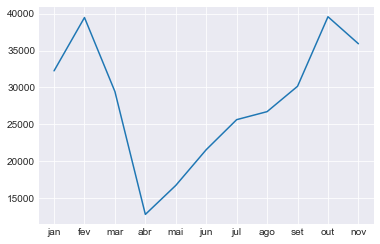

In [169]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(adm)
    plt.show()

## Dados de Desligamentos

In [160]:
des = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].shape[0]
    des.append(d)


In [161]:
des

[26336, 29711, 40489, 32906, 25380, 21474, 22344, 23776, 26270, 27959, 27178]

In [162]:
des = pd.DataFrame(des, index=mon, columns=['desligamentos'])
des

,desligamentos
jan,26336
fev,29711
mar,40489
abr,32906
mai,25380
jun,21474
jul,22344
ago,23776
set,26270
out,27959


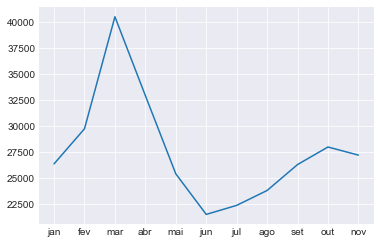

In [163]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(des)
    plt.show()

# Admissões/Desligamentos

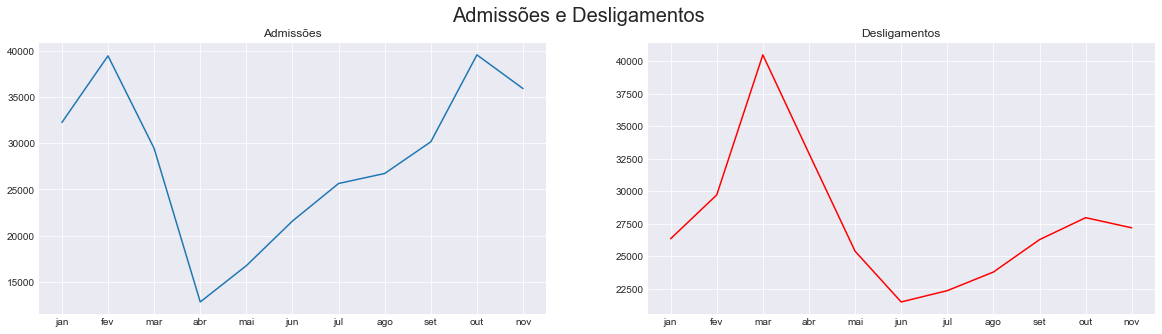

In [170]:
with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(1, 2, figsize = (20, 5))

    axes[0].plot(adm)
    axes[0].set_title("Admissões")
    #axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

    axes[1].plot(des, color='r')
    axes[1].axis('tight')
    axes[1].set_title("Desligamentos")
    #axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    
    fig.suptitle("Admissões e Desligamentos", fontsize=20)
    plt.show()

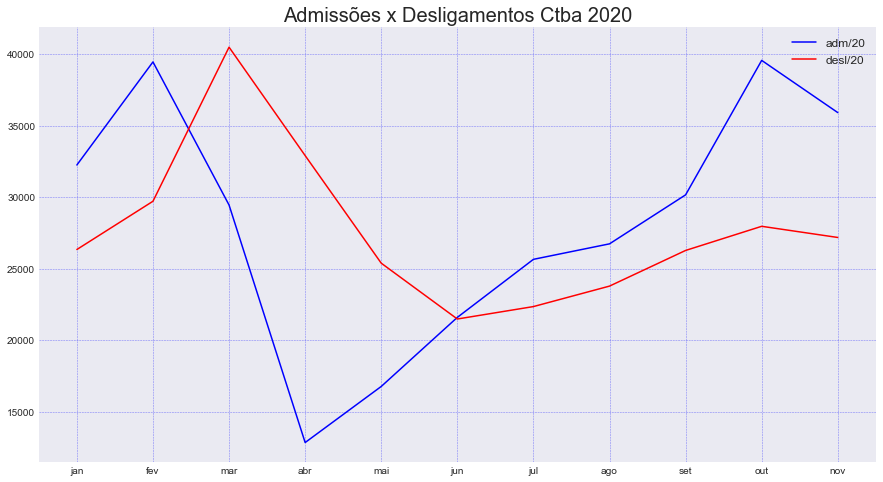

In [235]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(adm, color="b")
    ax.plot(des, color="r")
    ax.set_title("Admissões x Desligamentos Ctba 2020", fontsize=20)
    ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.legend(('adm/20', 'desl/20'), fontsize=12)
    #plt.rcParams['figure.figsize'] = (8,5)
    plt.show();

In [213]:
adm_des = adm.join(des)
adm_des.desligamentos.values

array([26336, 29711, 40489, 32906, 25380, 21474, 22344, 23776, 26270,
       27959, 27178], dtype=int64)

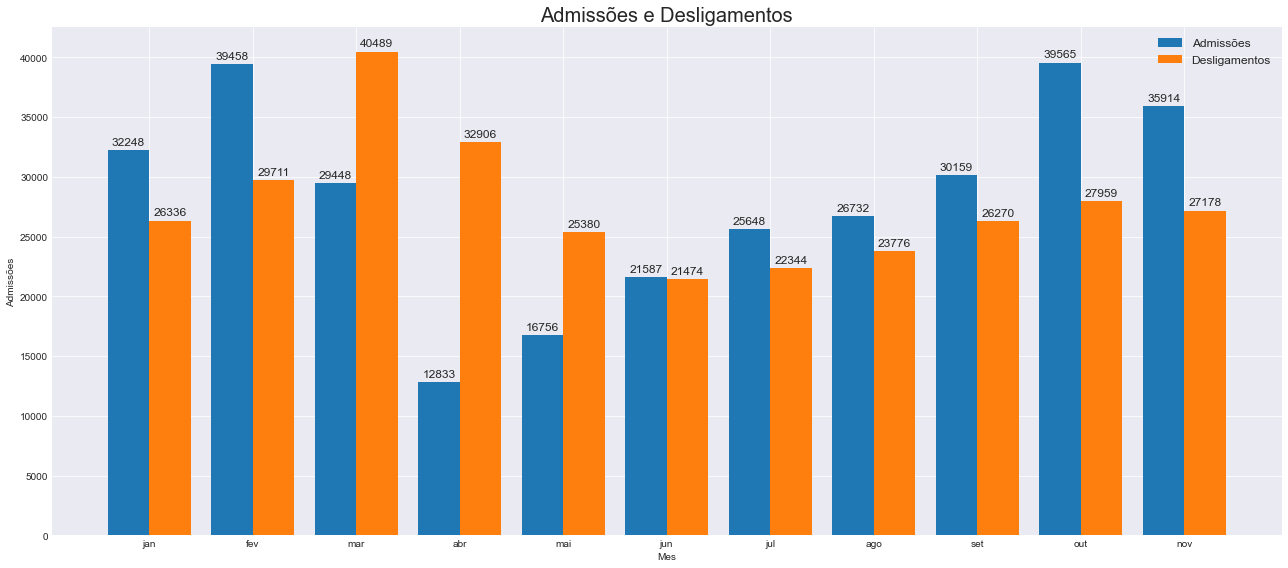

In [231]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4
        
    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, adm_des.admissoes.values, width, label='Admissões')
    rects2 = ax.bar(x+width/2, adm_des.desligamentos.values, width, label='Desligamentos')
    
    ax.set_ylabel('Admissões')
    ax.set_title('Admissões e Desligamentos', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon)
    ax.legend(fontsize=12)
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=12,
                        ha='center',
                        va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

# Criar Gráfico com Saldo
---

In [15]:
data[0]

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa
...,...,...,...,...,...,...,...,...
2617203,410690,Alimentação,CLT,Fundamental Completo,M,20,Branca,ADM/Reemprego
2617230,410690,Administrativas,Temporário,Médio Completo,M,43,Não Informada,DES/Término de Contrato Determinado
2617252,410690,Ind. Transformação,Não Identificado,Médio Completo,F,20,Branca,ADM/Reemprego
2617268,410690,Administrativas,Contrato a Termo,Médio Completo,M,40,Branca,DES/A pedido


In [225]:
adm_desc = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['descricao']).size()
    adm_desc.append(a)
    

In [226]:
columns=['ADM/Reemprego','ADM/Primeiro Emprego','ADM/Prazo Determinado','ADM/Reintegração']
adm_desc = pd.DataFrame(adm_desc, index=mon, columns=columns)
adm_desc

,ADM/Reemprego,ADM/Primeiro Emprego,ADM/Prazo Determinado,ADM/Reintegração
jan,30459,1664,113,12
fev,37322,2023,90,23
mar,27957,1421,48,22
abr,12202,566,40,25
mai,15902,714,111,29
jun,20811,642,102,32
jul,24271,884,469,24
ago,25618,1004,87,23
set,29030,1076,25,28
out,37953,1540,50,22


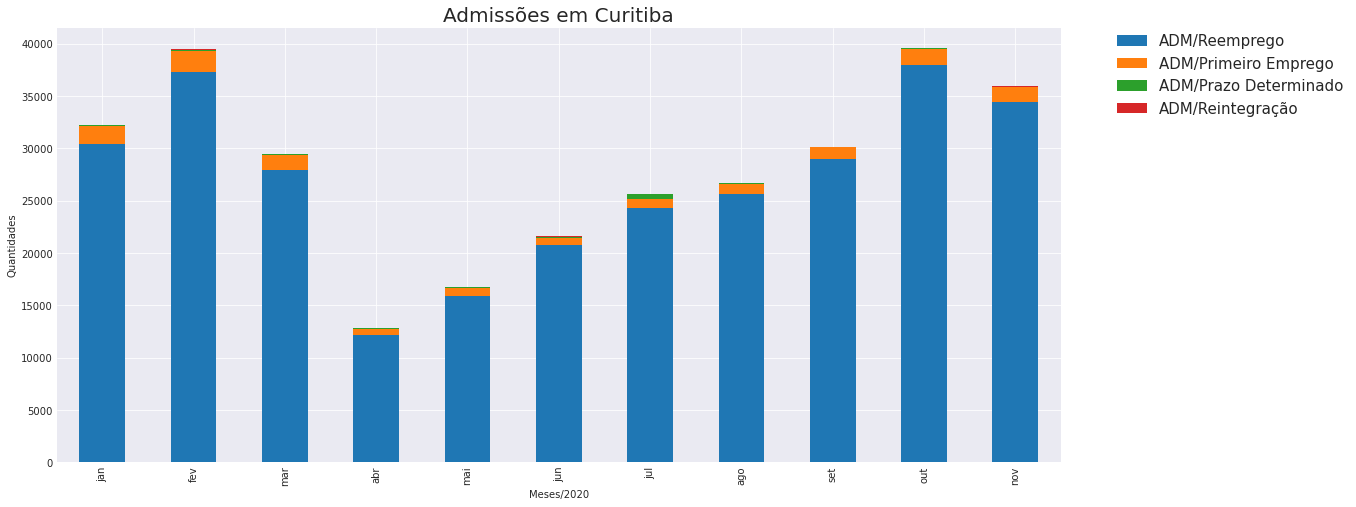

In [229]:
with plt.style.context('seaborn-darkgrid'):
    adm_desc.plot(kind="bar", stacked=True, figsize=(18,8))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Admissões em Curitiba", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades");

In [219]:
des_desc = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['descricao']).size()
    des_desc.append(d)


In [221]:
cols = ['DES/Sem Justa Causa',
        'DES/A pedido',
        'DES/Término de Contrato Determinado',
        'DES/Acordo',
        'DES/Justa Causa',
        'DES/Término de Contrato',
        'DES/Não Identificado',
        'DES/Morte',
        'DES/Culpa Recíproca',
        'DES/Aposentadoria']
des_desc = pd.DataFrame(des_desc, columns=cols, index=mon)
#des_desc = des_desc.drop(columns='DES/Tipo Ignorado')
des_desc

,DES/Sem Justa Causa,DES/A pedido,DES/Término de Contrato Determinado,DES/Acordo,DES/Justa Causa,DES/Término de Contrato,DES/Não Identificado,DES/Morte,DES/Culpa Recíproca,DES/Aposentadoria
jan,10100,9148,5223,534,487,487,263,55,28,11
fev,12178,9493,5835,654,424,789,239,62,22,15
mar,17893,8286,12226,727,413,403,428,70,30,13
abr,19518,4080,8048,469,332,232,70,72,79,5
mai,15420,3809,5109,344,294,252,59,68,18,7
jun,11474,5026,3979,359,268,129,140,79,16,3
jul,10914,6158,4274,368,288,108,76,134,20,4
ago,9757,7346,5619,480,263,72,95,117,16,10
set,9216,8825,6712,686,340,243,101,120,18,9
out,10253,10444,5832,600,322,212,189,74,12,21


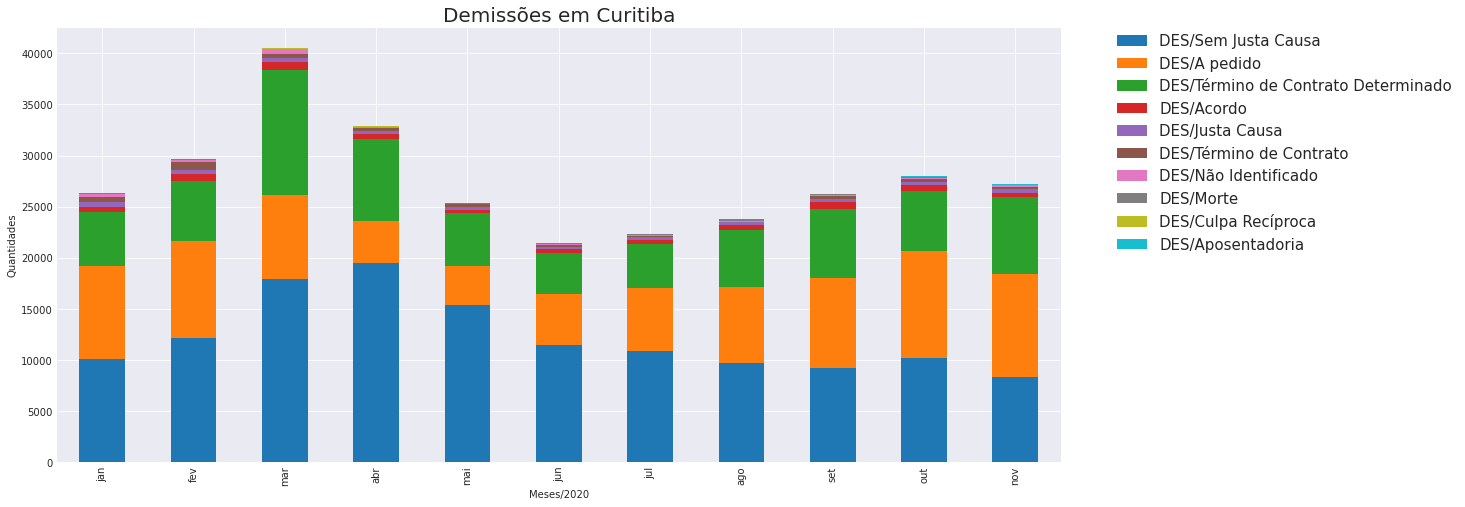

In [230]:
with plt.style.context('seaborn-darkgrid'):
    des_desc.plot(kind="bar", stacked=True, figsize=(18,8))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Demissões em Curitiba", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades");

# Distribuição por gênero
---

In [16]:
data[0]

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa
...,...,...,...,...,...,...,...,...
2617203,410690,Alimentação,CLT,Fundamental Completo,M,20,Branca,ADM/Reemprego
2617230,410690,Administrativas,Temporário,Médio Completo,M,43,Não Informada,DES/Término de Contrato Determinado
2617252,410690,Ind. Transformação,Não Identificado,Médio Completo,F,20,Branca,ADM/Reemprego
2617268,410690,Administrativas,Contrato a Termo,Médio Completo,M,40,Branca,DES/A pedido


# Admissões por gênero
---
## Utilizar gráfico de barra com duas representando os gêneros por mês

In [106]:
gene_adm = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['genero'].value_counts()
    gene_adm.append(a)


In [107]:
gene_adm = pd.DataFrame(gene_adm, index=mon)
gene_adm

,M,F
jan,18393,13855
fev,22236,17222
mar,16346,13102
abr,7237,5596
mai,9602,7154
jun,12612,8975
jul,15394,10254
ago,15510,11222
set,17508,12651
out,21943,17622


In [21]:
gene_adm.M.values

array([18393, 22236, 16346,  7237,  9602, 12612, 15394, 15510, 17508,
       21943, 20116], dtype=int64)

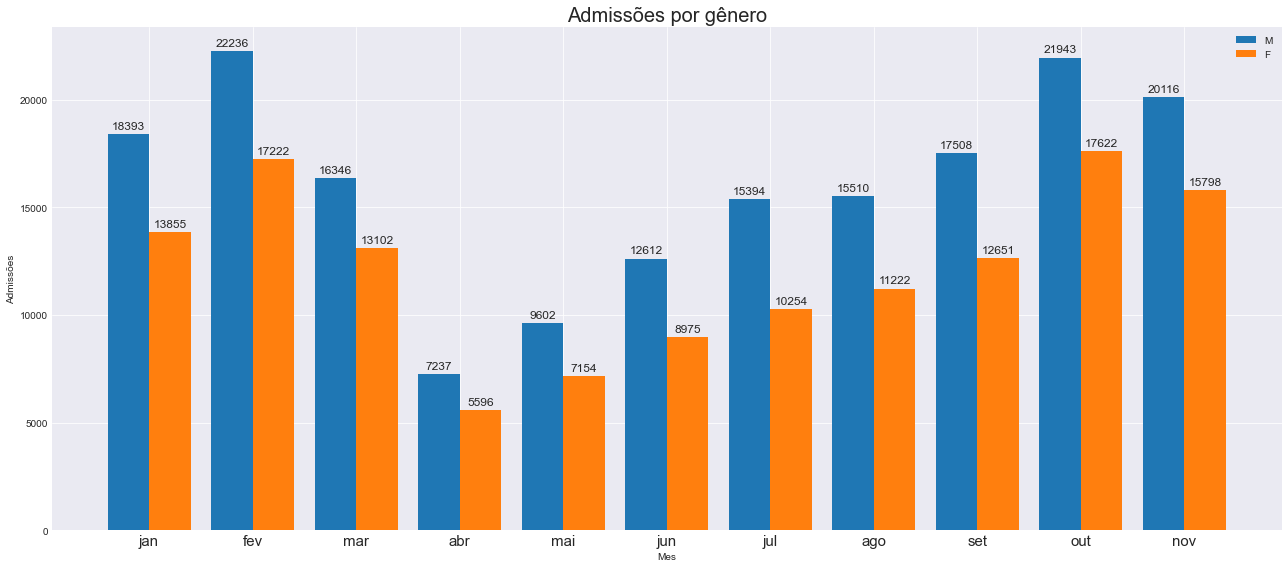

In [148]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, gene_adm.M.values, width, label='M')
    rects2 = ax.bar(x+width/2, gene_adm.F.values, width, label='F')
    
    ax.set_ylabel('Admissões')
    ax.set_title('Admissões por gênero', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=12,
                        ha='center',
                        va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

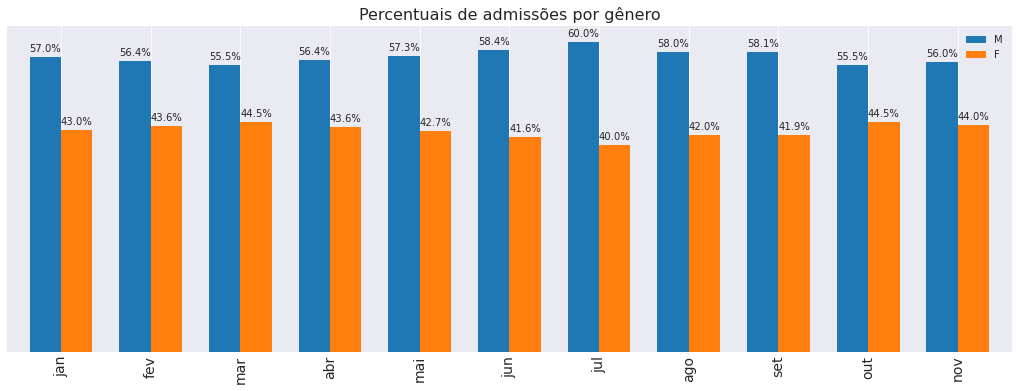

In [95]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_adm.div(gene_adm.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,6),width = 0.7,edgecolor=None)
    plt.legend(labels=gene_adm.columns,fontsize= 10)
    plt.title("Percentuais de admissões por gênero",fontsize= 16)

    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center')

# Demissões por gênero
---

In [102]:
gene_dem = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['genero'].value_counts()
    gene_dem.append(d)


In [103]:
gene_dem = pd.DataFrame(gene_dem, index=mon)
gene_dem

,M,F
jan,14061,12275
fev,16245,13466
mar,23277,17212
abr,18259,14647
mai,13584,11796
jun,12225,9249
jul,12860,9484
ago,13474,10302
set,15396,10874
out,16025,11934


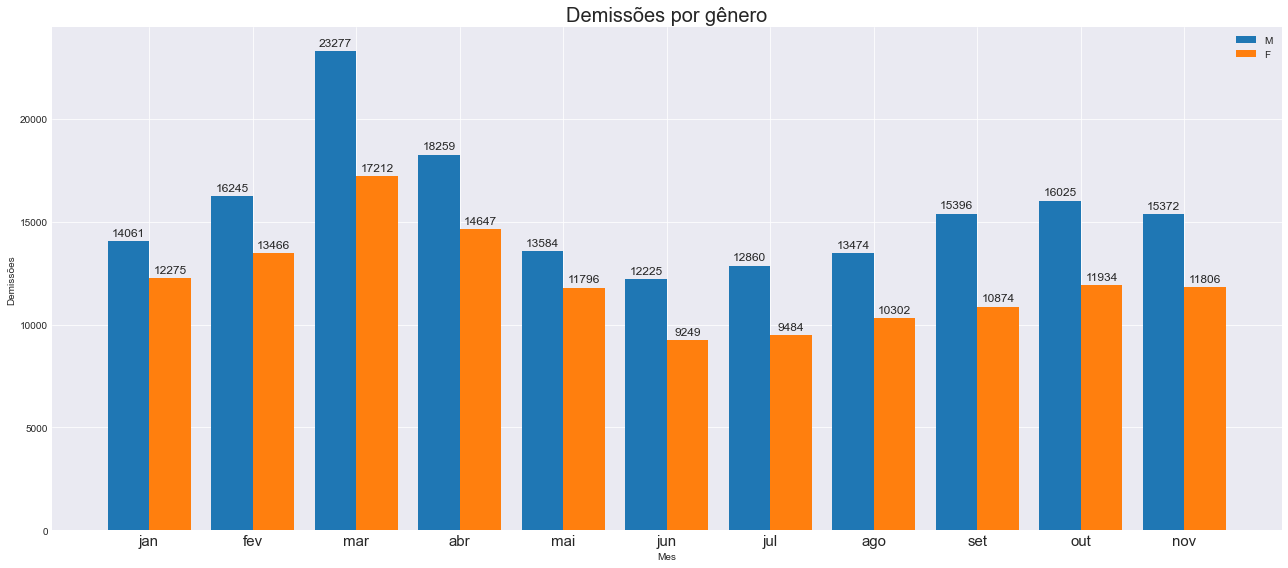

In [112]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, gene_dem.M.values, width, label='M')
    rects2 = ax.bar(x+width/2, gene_dem.F.values, width, label='F')
    
    ax.set_ylabel('Demissões')
    ax.set_title('Demissões por gênero', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=12,
                        ha='center', va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

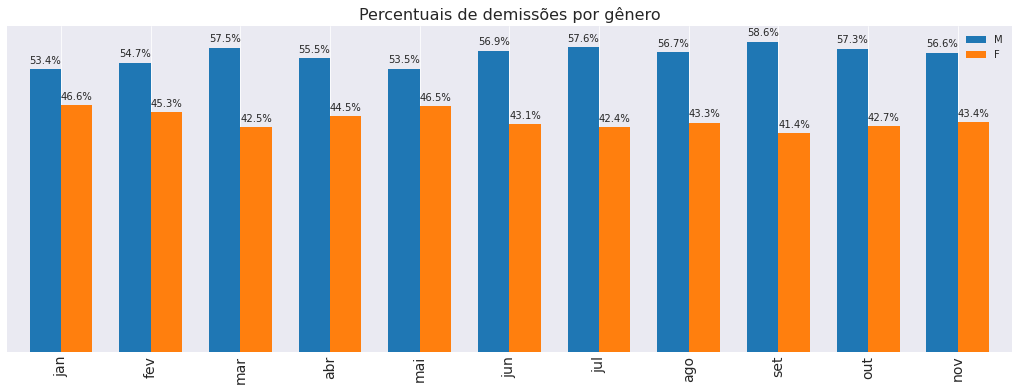

In [110]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_dem.div(gene_dem.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,6),width = 0.7,edgecolor=None)
    plt.legend(labels=gene_dem.columns,fontsize= 10)
    plt.title("Percentuais de demissões por gênero",fontsize= 16)

    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center')

In [119]:
gene_adm.sum()

M    176897
F    133451
dtype: int64

In [118]:
gene_dem.sum()

M    170778
F    133045
dtype: int64

In [129]:
adm.sum()

0    310348
dtype: int64

In [131]:
des.sum()

0    303823
dtype: int64